# Final script for inverse problem: taking in observed lightcurve and extracting parameters using PHOEBE

In [129]:
# Necessary Imports
import matplotlib.pyplot as plt

plt.rc('font', family='serif', size=14, serif='STIXGeneral')
plt.rc('mathtext', fontset='stix')

import phoebe
import numpy as np
import pandas as pd
from astropy.time import Time
from astropy.timeseries import TimeSeries


logger = phoebe.logger('error')
b = phoebe.default_binary(contact_binary=True)

### Step 1) Read in CSV that has already had photometry/ differential mag done

In [130]:
#Read in .csv with only target data
#df = pd.read_csv("target_phot_2023_11_19-22.csv")

#Read in .csv with julian time
df = pd.read_csv("all_phot_2023_11_19-22.csv")

/tmp/ipykernel_783/500291579.py:5: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("all_phot_2023_11_19-22.csv")


In [131]:
def julianToDatetime(hjd):
    time = Time(hjd, format='jd', scale='tdb')
    return time.to_datetime()

def datetimeToJulian(datetime):
  return Time(datetime).jd

In [132]:
df["times"]=pd.to_datetime(df["timestamp"],format="%Y-%m-%dT%H:%M:%S.0000")
df["julian"]= [datetimeToJulian(t) for t in df["times"]]

In [133]:
_NN_apertures=8

In [134]:
#dflux calculations
#if you do this and it is all null you've read in the target csv, not the all csv
for ap_num in range(_NN_apertures):
    mag_title = 'objflux_' + str(ap_num)  
    refmag_title = 'refflux_' + str(ap_num)  
    dmag_title = 'dflux_' + str(ap_num)  
    print(df[df['id']==2][mag_title])
    df[refmag_title]=df[df['id']==2][mag_title]
    print(df[refmag_title])
    df[refmag_title].fillna(method='ffill', inplace=True)
    print(df[refmag_title])
    df[refmag_title].fillna(method='bfill', inplace=True)
    print(df[refmag_title])

    df[dmag_title]=df[mag_title]-df[refmag_title]

df

1         66434.268288
11        66434.268288
21        68552.744134
31        61284.749245
41        59665.275906
             ...      
38741    219445.700509
38751    224945.469445
38761    225464.365864
38771    237220.447969
38781    282614.042558
Name: objflux_0, Length: 3879, dtype: float64
0                 NaN
1        66434.268288
2                 NaN
3                 NaN
4                 NaN
             ...     
38785             NaN
38786             NaN
38787             NaN
38788             NaN
38789             NaN
Name: refflux_0, Length: 38790, dtype: float64
0                  NaN
1         66434.268288
2         66434.268288
3         66434.268288
4         66434.268288
             ...      
38785    282614.042558
38786    282614.042558
38787    282614.042558
38788    282614.042558
38789    282614.042558
Name: refflux_0, Length: 38790, dtype: float64
0         66434.268288
1         66434.268288
2         66434.268288
3         66434.268288
4         66434.2682

/tmp/ipykernel_783/1737200200.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[refmag_title].fillna(method='ffill', inplace=True)
/tmp/ipykernel_783/1737200200.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[refmag_title].fillna(method='bfill', inplace=True)
/tmp/ipykernel_783/1737200200.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[refmag_title].fillna(method='ffill', inplace=True)
/tmp/ipykernel_783/1737200200.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[refmag_title].fillna(method='bfill', inplace=True)
/tmp/ipykernel_783/1737200200.py:10: FutureWarning: Series.fillna with 'method' is deprecated an

,Unnamed: 0,id,xcenter,ycenter,aperture_sum_0,aperture_sum_err_0,aperture_sum_1,aperture_sum_err_1,aperture_sum_2,aperture_sum_err_2,...,refflux_3,dflux_3,refflux_4,dflux_4,refflux_5,dflux_5,refflux_6,dflux_6,refflux_7,dflux_7
0,0,1,1093.115422,503.309606,365276.239610,677.807303,967287.423016,1104.725766,1.340837e+06,1304.413102,...,2.544487e+05,1.220725e+06,2.666368e+05,1.278528e+06,2.714194e+05,1.303619e+06,2.724769e+05,1.312102e+06,2.713119e+05,1.310798e+06
1,1,2,1283.574744,921.153928,68040.323019,296.441960,175383.174438,480.144459,2.425049e+05,573.217223,...,2.544487e+05,0.000000e+00,2.666368e+05,0.000000e+00,2.714194e+05,0.000000e+00,2.724769e+05,0.000000e+00,2.713119e+05,0.000000e+00
2,2,3,1091.251741,840.423921,40125.894448,230.184277,104779.875107,377.206280,1.472688e+05,457.747597,...,2.544487e+05,-1.047440e+05,2.666368e+05,-1.101832e+05,2.714194e+05,-1.120519e+05,2.724769e+05,-1.122360e+05,2.713119e+05,-1.120281e+05
3,3,4,1348.527134,46.221302,18185.535618,159.872927,48700.272251,268.672800,7.087147e+04,337.692525,...,2.544487e+05,-1.889138e+05,2.666368e+05,-1.979853e+05,2.714194e+05,-2.011126e+05,2.724769e+05,-2.020347e+05,2.713119e+05,-2.009877e+05
4,4,5,881.785733,1146.819174,8914.454226,118.196872,24586.241666,205.042765,3.816552e+04,270.469598,...,2.544487e+05,-2.253913e+05,2.666368e+05,-2.362736e+05,2.714194e+05,-2.404294e+05,2.724769e+05,-2.415504e+05,2.713119e+05,-2.403663e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38785,5,6,165.108296,221.795692,0.000000,53.173616,0.000000,106.347231,0.000000e+00,159.520847,...,1.001247e+06,-1.022149e+06,1.126488e+06,-1.159147e+06,1.265219e+06,-1.312247e+06,1.421933e+06,-1.485944e+06,1.597636e+06,-1.681243e+06
38786,6,7,430.996559,94.107305,0.000000,53.173616,0.000000,106.347231,0.000000e+00,159.520847,...,1.001247e+06,-1.022405e+06,1.126488e+06,-1.159548e+06,1.265219e+06,-1.312825e+06,1.421933e+06,-1.486730e+06,1.597636e+06,-1.682269e+06
38787,7,8,1339.800021,457.813614,41322.544787,233.410827,116344.324933,395.904205,1.948441e+05,518.653998,...,1.001247e+06,-7.326315e+05,1.126488e+06,-7.531050e+05,1.265219e+06,-7.655465e+05,1.421933e+06,-7.727632e+05,1.597636e+06,-7.768454e+05
38788,8,9,1100.734905,752.145903,49521.200540,254.418817,133458.709467,422.058194,2.174986e+05,545.270729,...,1.001247e+06,-7.067212e+05,1.126488e+06,-7.251045e+05,1.265219e+06,-7.357144e+05,1.421933e+06,-7.412874e+05,1.597636e+06,-7.431274e+05


In [135]:
#Shift all flux up so we have no negative flux values
min_flux = abs(df["dflux_5"].min())
df["dflux"] = df["dflux_5"] + min_flux

In [136]:
print(len(df.index))
#print(len(df2.index))

38790


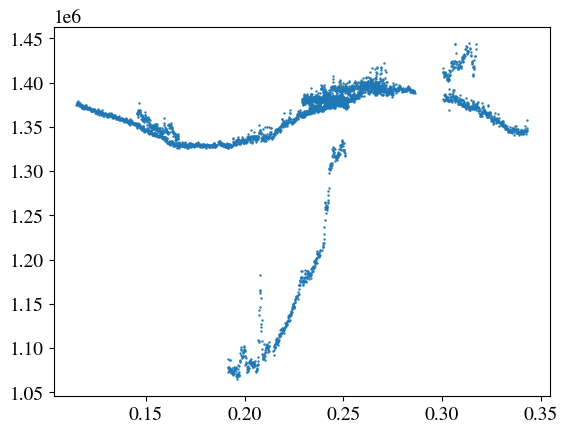

In [137]:
#scatter plot of lc data (observed)
period = 0.3439788
targ_index = 3
df_targ=df[df["id"]==targ_index]
plt.scatter(df_targ["julian"]%period,df_targ["dflux"], s=0.5)
#plt.gca().invert_yaxis()

In [138]:
#Output new data to .csv
df_targ.to_csv("target_phot_forPhoebe.csv")
df_targ2 = pd.read_csv("target_phot_forPhoebe.csv")

### Step 2) Run Ebai estimator

[2460260.66988426 2460260.67       2460260.67011574 ... 2460269.83434028
 2460269.83445602 2460269.83457176]
[ 3.66988426  3.67        3.67011574 ... 12.83434028 12.83445602
 12.83457176]


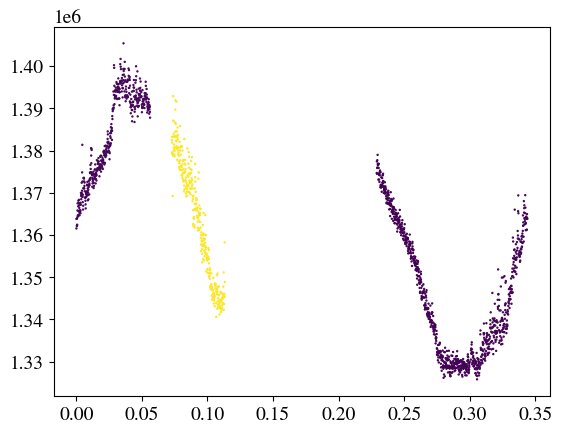

In [139]:
# Cut only to good date range
#Full day curve: 
df_targ=df_targ2[np.logical_or(np.logical_and(df_targ2['julian']>2460260, df_targ2['julian']<2460262),np.logical_and(df_targ2['julian']>2460269.8, df_targ2['julian']<2460270))]
# df_targ=df_targ2[np.logical_or(np.logical_and(df_targ2['julian']>2460260, df_targ2['julian']<2460260.81),
#                                np.logical_and(np.logical_and(df_targ2['julian']>2460269, df_targ2['julian']<2460269.85),
#                                               np.logical_or(df_targ2['julian']<2460269.1, df_targ2['julian']>2460269.8)))]

#make times and fluxes arrays for PHOEBE
epoch = 2460257
fluxes = np.array(df_targ["dflux"])
times = np.array(df_targ["julian"])
print(times)
times=(((times)-(epoch)))
print(times)

# df_targ.set_index(pd.DatetimeIndex(df_targ['julian']), inplace=True)
# ts = TimeSeries.from_pandas(df_targ)
# times = ts["time"].mjd

#plt.scatter(times,df_targ["dflux"], s=0.5)
#plt.scatter(df_targ["julian"]%period,df_targ["dflux"], s=0.5)
plt.scatter(times%period,fluxes, s=0.5, c = times)


In [140]:
#add our observed data into phoebe
orbphases = phoebe.linspace(0,1,101)
meshphases = phoebe.linspace(0,1,51)
b.add_dataset('lc', times=times, fluxes=fluxes, dataset='lc01')
b.add_dataset('orb', compute_phases=orbphases, dataset='orb01')
b.add_dataset('mesh', compute_phases=meshphases, dataset='mesh01', columns=['teffs'])


<ParameterSet: 85 parameters | contexts: figure, compute, constraint, dataset>

In [141]:
# s_epoch = 2460257
# s_period = 0.3439788
# forward_times = np.linspace(s_epoch, s_epoch*10*period, 1000)
# # forward_fluxes = np.ones(len(forward_times))

# b.add_dataset('lc', times=forward_times, dataset='lc01')

In [142]:
#input Christopoulou data 

# print(phoebe.list_online_passbands())
b.set_value('passband', 'SDSS:g')
b.set_value_all('ld_mode', 'lookup')
b.set_value_all('ld_mode_bol', 'lookup')
b.set_value_all('atm', 'ck2004')

b.set_value('pblum_mode', 'dataset-scaled')
b.set_value_all('gravb_bol', 0.32)
b.set_value_all('irrad_frac_refl_bol', 0.5)

b['period@binary'] = 0.3439788   # period = 0.34 day
b['t0_supconj'] = 0.14
b['incl@binary'] = 89.6
b['Av'] = 0.179

b['teff@primary'] = 5742
b['teff@secondary'] = 5600

b.flip_constraint('mass@primary', solve_for='sma@binary')
b['mass@primary@component'] = 1.25
b['q'] = 0.110

b['requiv@primary'] = 1.37

print(b.run_checks())   # check if run_compute is possible
print(b)

Thu, 14 Dec 2023 22:44 BUNDLE       ERROR   Constraint 'pot@contact_envelope@envelope@constraint' raised the following error while attempting to solve for 'pot@contact_envelope@envelope@component'.  Consider flipping the constraint or changing the value of one of ['requiv@primary@star@component', 'q@binary@orbit@component', 'sma@binary@orbit@component', 'pot@contact_envelope@envelope@component'] until the constraint succeeds.  Original error: roche_contact_Omega_at_partial_vol::Volume is outside bounds.
Thu, 14 Dec 2023 22:44 BUNDLE       ERROR   Constraint 'requiv@secondary@star@constraint' raised the following error while attempting to solve for 'requiv@secondary@star@component'.  Consider flipping the constraint or changing the value of one of ['pot@contact_envelope@envelope@component', 'q@binary@orbit@component', 'sma@binary@orbit@component', 'requiv@secondary@star@component'] until the constraint succeeds.  Original error: potential > L1 critical value
Thu, 14 Dec 2023 22:44 BUNDL

Run Checks Report: PASS

PHOEBE Bundle: 248 parameters
                        t0@system: 0.0 d
                        ra@system: 0.0 deg
                       dec@system: 0.0 deg
                  distance@system: 1.0 m
                    vgamma@system: 0.0 km / s
C                      ebv@system: 0.057741935483870965
                        Av@system: 0.179
                        Rv@system: 3.1
                 hierarchy@system: orbit:binary(star:primary, star:secondary, envelope:contact_envelope)
         requiv@primary@component: 1.37 solRad
C    requiv_max@primary@component: 1.3922159789270905 solRad
C    requiv_min@primary@component: 1.3199515362463703 solRad
           teff@primary@component: 5742.0 K
C          logg@primary@component: 4.261536510961695
        syncpar@primary@component: 1.0
C        period@primary@component: 0.3439788 d
C          freq@primary@component: 18.26619838199331 rad / d
      gravb_bol@primary@component: 0.32
   irrad_frac_refl_bol@primary...: 0.

In [143]:
b.run_compute(model='default')

100%|██████████| 1880/1880 [03:32<00:00,  8.86it/s]


<ParameterSet: 530 parameters | kinds: orb, lc, mesh>

In [144]:
print(b["lc01"])

ParameterSet: 31 parameters
               times@lc01@dataset: [ 3.66988426  3.67        3.67011574 ... 12.83434028
 12.83445602 12.83457176] d
              fluxes@lc01@dataset: [1376525.84269659 1376861.04362954 1373110.65161969
 ... 1347292.71168655 1350449.25714966
 1347211.66054152] W / m2
            passband@lc01@dataset: SDSS:g
    intens_weighting@lc01@dataset: energy
       compute_times@lc01@dataset: [] d
C     compute_phases@lc01@dataset: []
           phases_t0@lc01@dataset: t0_supconj
        mask_enabled@lc01@dataset: True
         mask_phases@lc01@dataset: []
        solver_times@lc01@dataset: auto
              sigmas@lc01@dataset: [] W / m2
          pblum_mode@lc01@dataset: dataset-scaled
             l3_mode@lc01@dataset: flux
                  l3@lc01@dataset: 0.0 W / m2
             exptime@lc01@dataset: 0.0 s
    enabled@lc01@phoebe01@compute: True
      fti_method@phoebe01@compute: none
     ld_mode@primary@lc01@dataset: lookup
   ld_mode@secondary@lc01@dataset:

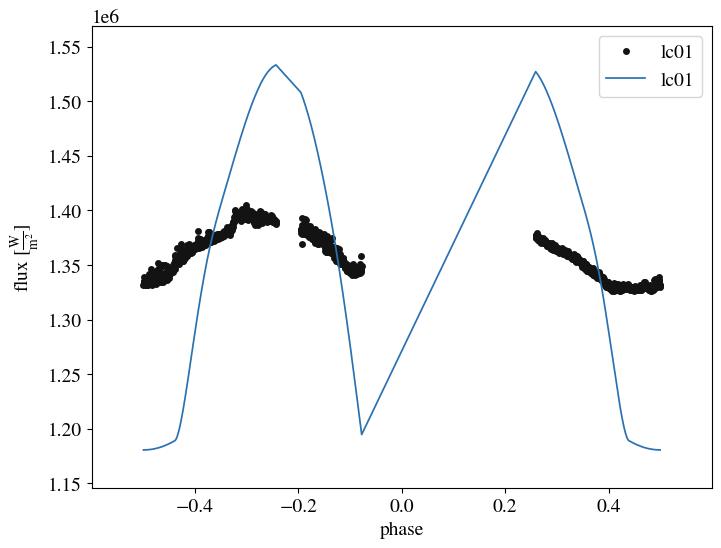

(<autofig.figure.Figure | 1 axes | 2 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [145]:
# simple plotting
b.plot('lc01', x='phase', s=0.008, legend=True, show=True, save='./DN/lightCurve_forwardModel.png')   # plot lc data and forward model

#b.plot('mesh01', phase=0, legend=True, fc='teffs', ec='None', fcmap='viridis', show=True)   # plot mesh w/ temp color @t0
# animations
# b.plot(y={'orb':'ws'}, ylim={'lc':(0.4*10**10,0.8*10**10)}, size=0.008, fc={'mesh':'teffs'}, ec={'mesh':'None'}, 
#         fcmap='viridis', animate=True, save='./DN/animations_sync.gif')   # sync animation for lc, orb, mesh
# b.plot('orb01', y='ws', legend=True, animate=True, save='./DN/orb2d.gif')   # animate face-on 2d orbit
# b.plot('orb01', projection='3d', legend=True, animate=True, save='./DN/orb3d.gif')   # animate 3d orbit
# b.plot('mesh01', fc='teffs', ec='None', fcmap='viridis', legend=True, animate=True, save='./DN/mesh.gif')   # animate mesh

In [146]:
out_df4 = pd.DataFrame()
out_df4["christ_phases"] = b["times@lc01@default@model"]._value.value
out_df4["christ_fluxes"] = b["fluxes@default@model"]._value.value
out_df4.to_csv("christOut.csv")

In [147]:
# start of inverse problem: add and run KNN estimator
b.add_solver('estimator.ebai', ebai_method='knn', solver='ebai_knn', overwrite=True)
b.run_solver('ebai_knn', solution='ebai_knn_sol', phase_bin=False)
print(b.adopt_solution('ebai_knn_sol', trial_run=True))   # see proposed KNN solution params before adopting


/home/nadiabolef/contactBinaries/venv/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator KNeighborsRegressor from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/nadiabolef/contactBinaries/venv/lib/python3.10/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.0.2 when using version 1.3.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


ParameterSet: 5 parameters
   t0_supconj@binary@orbit@com...: 0.1066617148134366 d
   teffratio@binary@orbit@comp...: 0.9358971608698623
      incl@binary@orbit@component: 26.293192168645643 deg
   fillout_factor@contact_enve...: 0.4056515069032432
         q@binary@orbit@component: 0.5794919858619294


In [148]:
b.flip_constraint('teffratio', solve_for='teff@secondary')

<ConstraintParameter: {teff@secondary@component} = {teffratio@binary@component} * {teff@primary@component} (solar units) => 5600.0 K>

In [149]:
# if adopt all proposed params, uncomment below:
b.flip_constraint('pot@contact_envelope', solve_for='requiv@primary')
print(b.adopt_solution('ebai_knn_sol'))

ParameterSet: 34 parameters
      t0_supconj@binary@component: 0.1066617148134366 d
       teffratio@binary@component: 0.9358971608698623
            incl@binary@component: 26.293192168645643 deg
C  fillout_factor@contact_enve...: 0.4056515069032432
               q@binary@component: 0.5794919858619294
C     t0_perpass@binary@component: 0.020667014813436607 d
C         t0_ref@binary@component: 0.1066617148134366 d
C     compute_phases@lc01@dataset: []
C     compute_times@orb01@dataset: [0.10666171 0.1101015  0.11354129 ...
 0.44376094 0.44720073 0.45064051] d
C    compute_times@mesh01@dataset: [0.10666171 0.11354129 0.12042087 ...
 0.43688136 0.44376094 0.45064051] d
C        teff@secondary@component: 5373.921497714749 K
C          asini@binary@component: 1.1480755667103972 solRad
C         asini@primary@component: 0.4212117541764628 solRad
C          incl@primary@component: 26.293192168645643 deg
C       asini@secondary@component: 0.7268638125339344 solRad
C        incl@secondary@comp

In [150]:
b.run_compute(model='ebai_knn_model', overwrite=True)

100%|██████████| 1880/1880 [04:53<00:00,  6.40it/s]


<ParameterSet: 530 parameters | kinds: orb, lc, mesh>

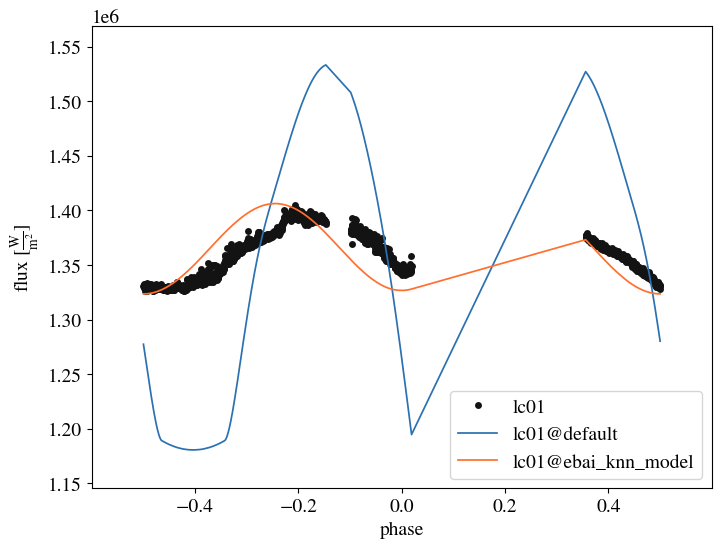

(<autofig.figure.Figure | 1 axes | 3 call(s)>,
 <Figure size 800x600 with 1 Axes>)

In [151]:
b.plot('lc01', x='phase', ls='-', s=0.008, legend=True, show=True, save='./DN/lc_inverse_obs_no_mod.png')
# b.plot('mesh01', fc='teffs', ec='None', fcmap='viridis', animate=True, save='./DN/mesh_inverse_obs.gif')
# b.plot(y={'orb':'ws'}, ylim={'lc':(0.4*10**10,0.8*10**10)}, size=0.008, fc={'mesh':'teffs'}, ec={'mesh':'None'}, 
#         fcmap='viridis', animate=True, save='./DN/animations_sync_inverse_obs.gif')
# b.plot('orb01', y='ws', legend=True, animate=True, save='./DN/orb2d_inverse_obs.gif')
# b.plot('orb01', projection='3d', legend=True, animate=True, save='./DN/orb3d_inverse_obs.gif')
# b.plot('mesh01', fc='teffs', ec='None', fcmap='viridis', animate=True, save='./DN/mesh_inverse_obs.gif')


In [152]:
b.get_dataset("lc01").__dict__

{'_bundle': <PHOEBE Bundle: 1333 parameters | contexts: system, dataset, solution, constraint, figure, compute, solver, component, model, setting>,
 '_filter': {'dataset': 'lc01', 'context': 'dataset'},
 '_params': [<Parameter: times=[ 3.66988426  3.67        3.67011574 ... 12.83434028
   12.83445602 12.83457176] d | keys: description, value, default_unit, visible_if, required_shape, copy_for, readonly, advanced, latexfmt>,
  <Parameter: fluxes=[1376525.84269659 1376861.04362954 1373110.65161969 ...
   1347292.71168655 1350449.25714966 1347211.66054152] W / m2 | keys: description, value, default_unit, visible_if, required_shape, copy_for, readonly, advanced, latexfmt>,
  <Parameter: passband=SDSS:g | keys: description, choices, value, visible_if, copy_for, readonly, advanced, latexfmt>,
  <Parameter: intens_weighting=energy | keys: description, choices, value, visible_if, copy_for, readonly, advanced, latexfmt>,
  <Parameter: compute_times=[] d | keys: description, value, default_unit,

In [153]:
s = b["ebai_phases@ebai_knn@ebai_knn_sol@ebai@solution"]
print(s)
# for param in s._bundle._params:
#     # print(param._qualifier,"-",param._description)
#     print(param)
# # print(s._description)
# # print(s.__dict__)
# print("--")
# v = b["fitted_values@ebai_knn@ebai_knn_sol@ebai@solution"]
# # print(s.__dict__)
# print(v)
# print("---")
# print(v.__dict__)


Parameter: ebai_phases@ebai_knn_sol@solution
                       Qualifier: ebai_phases
                     Description: input phases to ebai
                           Value: [-0.5   -0.495 -0.49  ...  0.49   0.495  0.5  ]
                  Constrained by: 
                      Constrains: None
                      Related to: None



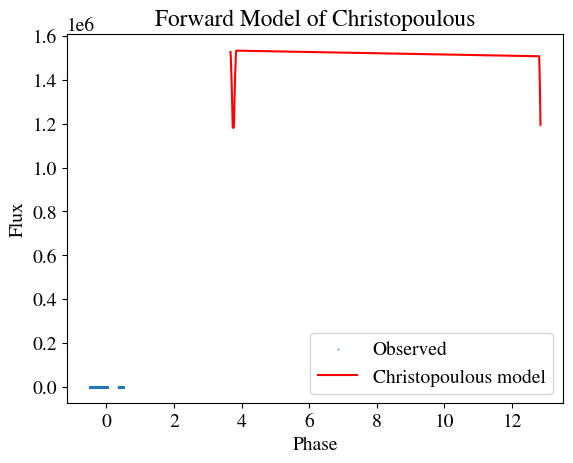

In [154]:
out_df1 = pd.DataFrame()
out_df2 = pd.DataFrame()
out_df3 = pd.DataFrame()


d = b.get_dataset("lc01").get_parameter(qualifier='fluxes')._value.value # W/m^2
t = b.get_dataset("lc01").get_parameter(qualifier='times')._value.value # Julian?
# out_df["fluxes"] = d
# out_df["times"] = t



s = b["ebai_knn@ebai_knn_sol@ebai@solution"]

out_df1["phases"] = b["ebai_phases@ebai_knn@ebai_knn_sol@ebai@solution"]._value.value
out_df1["fluxes"] = b["ebai_fluxes@ebai_knn@ebai_knn_sol@ebai@solution"]._value.value

out_df2["phases"] = b["input_phases@ebai_knn@ebai_knn_sol@ebai@solution"]._value.value
out_df2["fluxes"] = b["input_fluxes@ebai_knn@ebai_knn_sol@ebai@solution"]._value.value

out_df3["phases"] = b["times@lc01@default@model"]._value.value
out_df3["fluxes"] = b["fluxes@default@model"]._value.value

out_df1.to_csv("./EbaiData.csv")
out_df2.to_csv("./ObsData.csv")
out_df3.to_csv("./ChristData.csv")



# for param in s._params:
#     print(param._qualifier,"-",param._description)
# # print(s._description)
# # print(s.__dict__)
# print("--")
# v = b["fitted_values@ebai_knn@ebai_knn_sol@ebai@solution"]
# # print(s.__dict__)
# print(v)
# print("---")
# print(v.__dict__)

# plt.scatter(t,d)
plt.scatter(out_df2["phases"], out_df2["fluxes"], label="Observed",alpha=0.5,s=0.5)

# plt.plot(out_df1["ebai_phase"], out_df1["ebai_fluxes"], label="EBAI model",c="orange")
plt.plot(out_df3["phases"], out_df3["fluxes"], label="Christopoulous model",c="red")

plt.legend()
plt.ylabel("Flux")
plt.xlabel("Phase")
plt.title("Forward Model of Christopoulous")
plt.savefig("christ_fit.png")
plt.show()
# out_df["times"] = np.array(b.get_dataset("lc01").get_parameter(qualifier='times'))
# out_df["fluxes"] = np.array()

# ValueError: 13 results found: ['orbit@ebai_knn@ebai_knn_sol@ebai@solution', 'input_phases@ebai_knn@ebai_knn_sol@ebai@solution', 'input_fluxes@ebai_knn@ebai_knn_sol@ebai@solution', 'input_sigmas@ebai_knn@ebai_knn_sol@ebai@solution', 'ebai_phases@ebai_knn@ebai_knn_sol@ebai@solution', 'ebai_fluxes@ebai_knn@ebai_knn_sol@ebai@solution', 'fitted_twigs@ebai_knn@ebai_knn_sol@ebai@solution', 'fitted_values@ebai_knn@ebai_knn_sol@ebai@solution', 'fitted_units@ebai_knn@ebai_knn_sol@ebai@solution', 'adopt_parameters@ebai_knn@ebai_knn_sol@ebai@solution', 'adopt_distributions@ebai_knn@ebai_knn_sol@ebai@solution', 'adopt_values@ebai_knn@ebai_knn_sol@ebai@solution', 'comments@ebai_knn@ebai_knn_sol@ebai@solution']
